In [2]:
#constants
import numpy as np
import scipy as scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
r = np.linspace(0.0000001,15,1500) #GeV-1

#constants
m1 = 1.275
m2 = 4.65
#GeV/c^2 Mass of the Chamarium
invmu = 1/m1 + 1/m2
mu = 1/invmu
u0 = np.array([0.,1.0]) #dots to make sure number is real
#intital guesses for a and b:
#a = 0.2
#b = 0.19

In [3]:
def model_E(u,r,l,E,a,b):
    dvdr = (u[0]*l*(l+1))/(r**2) - 2*mu*u[0]*(E + ((4*a)/(3*r)) - b*r)
    return (u[1],dvdr)

def normalize_psi(psi, r):
    int_psi_square = scipy.integrate.simps((psi) ** 2, r)
    return psi/np.sqrt(int_psi_square)

def square_psi(psi):
    return (np.array(psi))**2

def turning_points(x):
    number_tps = 0
    for i in range(1, len(x)-1):
        if ((x[i-1] < x[i] and x[i+1] < x[i]) or (x[i-1] > x[i] and x[i+1] > x[i])):
            number_tps += 1
    return number_tps

def nodes(x):
    number_ns = 0
    for i in range(0, len(x)-1):
        if x[i]*x[i+1]<0:
            number_ns += 1
    return number_ns

In [4]:
def energy_iterate(l,E1,E3,a,b):
    #plt.xlabel("Distance from Nucleus ($MeV$)")
    #plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    #plt.legend(loc = "upper right")
    for i in range(10):
        E2 = 0.5*(E1 + E3)
        aa = odeint(model_E,u0,r, args = (l,E1,a,b))[:,0]
        b = odeint(model_E,u0,r, args = (l,E2,a,b))[:,0]
        c = odeint(model_E,u0,r, args = (l,E3,a,b))[:,0]  
        if turning_points(aa) != turning_points(b) and nodes(aa) != nodes(b):
            E3 = E2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            E1 = E2
    return E2#, plt.plot(r,square_psi(normalize_psi(b,r)), color = 'red')

In [5]:
def a_iterate(l,a1,a3,E,b):
    #plt.xlabel("Distance from Nucleus ($MeV$)")
    #plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    #plt.legend(loc = "upper right")
    for i in range(10):
        a2 = 0.5*(a1 + a3)
        aa = odeint(model_E,u0,r, args = (l,E,a1,b))[:,0]
        b = odeint(model_E,u0,r, args = (l,E,a2,b))[:,0]
        c = odeint(model_E,u0,r, args = (l,E,a3,b))[:,0]  
        if turning_points(aa) != turning_points(b) and nodes(aa) != nodes(b):
            a3 = a2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            a1 = a2
    return a2#, plt.plot(r,square_psi(normalize_psi(b,r)), color = 'red')

In [16]:
def b_iterate(l,b1,b3,E,a):
    plt.xlabel("Distance from Nucleus ($MeV$)")
    plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    plt.legend(loc = "upper right")
    for i in range(100):
        b2 = 0.5*(b1 + b3)
        aa = odeint(model_E,u0,r, args = (l,E,a,b1))[:,0]
        bb = odeint(model_E,u0,r, args = (l,E,a,b2))[:,0]
        c = odeint(model_E,u0,r, args = (l,E,a,b3))[:,0]  
        if turning_points(aa) != turning_points(bb) and nodes(aa) != nodes(bb):
            b3 = b2
        elif turning_points(bb) != turning_points(c) and nodes(bb) != nodes(c):
            b1 = b2
    return b2, plt.plot(r,square_psi(normalize_psi(bb,r)), color = 'red')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.19457191694958292, [<matplotlib.lines.Line2D at 0x7fbd669af0a0>])

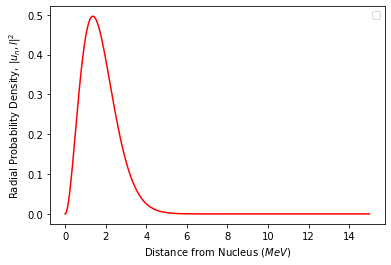

In [22]:
b_iterate(0,0.1,0.5,0.345,0.30)